<a href="https://colab.research.google.com/github/Daichi0517/gasyori/blob/main/FILES/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

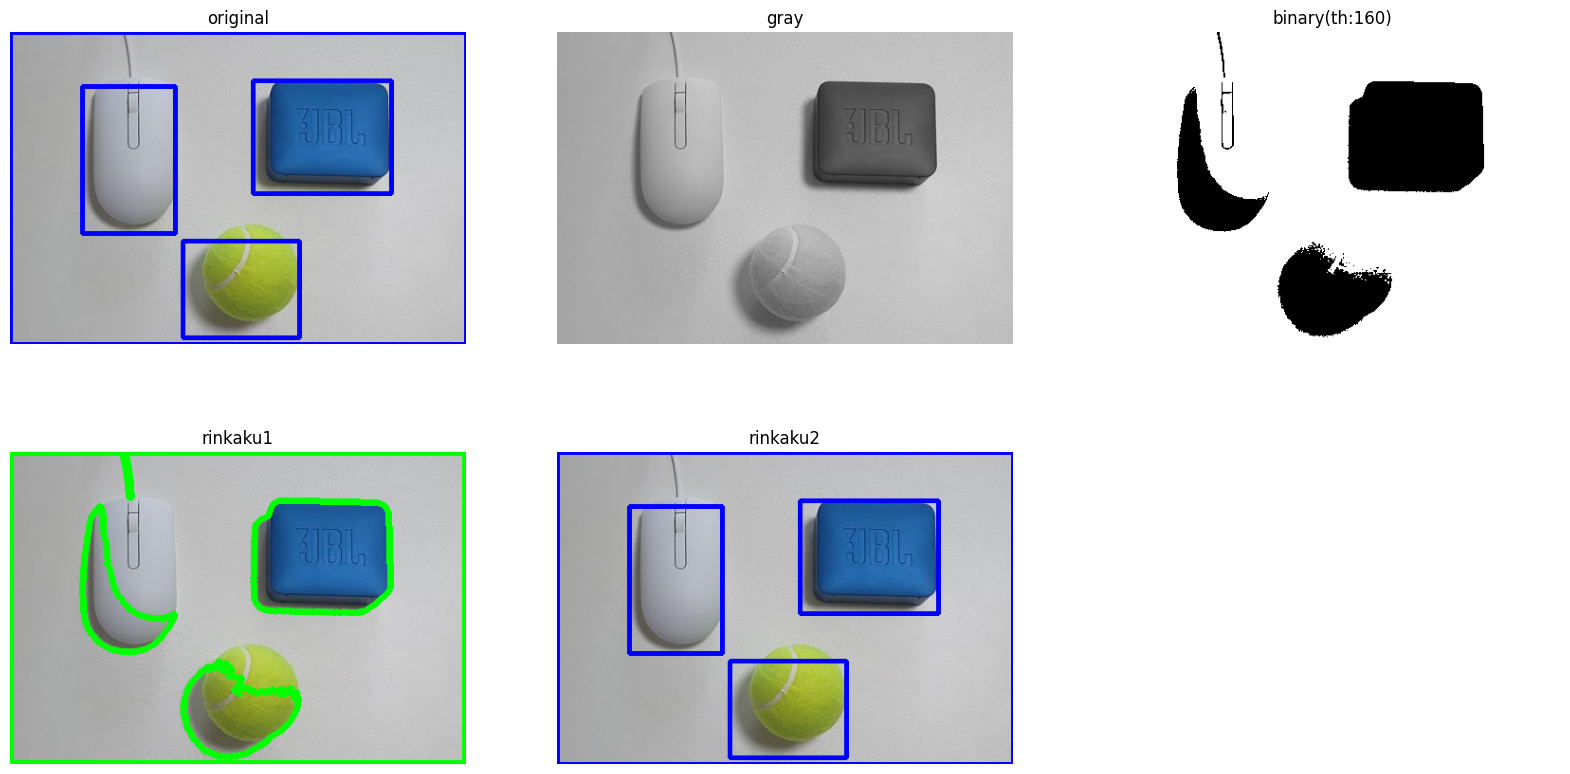

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#画像の読み込み
img = cv2.imread('rinkaku.jpg')
#グレイスケール
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#二値化
gray = 160
ret,img_2 = cv2.threshold(img_gray,gray,255,cv2.THRESH_BINARY)
#輪郭抽出
contours,hierarchy = cv2.findContours(img_2,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#ノイズ対策
contours = list(filter(lambda x:cv2.contourArea(x)>1000,contours))
#輪郭描画
img_rinkaku1 = cv2.drawContours(img.copy(),contours,-1,(0,255,0),5)
#四角形で囲む
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  img_rinkaku2 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
#表示
title_list = ['original','gray','binary(th:'+str(gray)+')','rinkaku1','rinkaku2']
imgs_list = [img,img_gray,img_2,img_rinkaku1,img_rinkaku2]
fig=plt.figure(figsize=(20,10))
for i,(title,img) in enumerate(zip(title_list,imgs_list)):
  ax = fig.add_subplot(2,3,i+1)
  ax.title.set_text(title)
  #BGRからRGBに変換
  img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  ax.imshow(img_RGB)
  ax.axis('off')
plt.show()